In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# RQ2: In which phase of the technology life cycle path are the technologies?
# - Interest in topic: #Papers on a topic over time
# - Parallel dazu: Interest in topic: Number of citations to papers on a topic over time
#- Publikationstyp: Workshop -> Conference -> Journal 

In [3]:
data = pd.read_csv('./data/500st.csv')
data.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract
0,32,"U Nikula, C Jurvanen, O Gotel, DC Gause",Empirical validation of the Classic Change Cur...,2010,… and Software Technology,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=37599...,1,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,32,2.91,8,4,11,"Context New processes, tools, and practices ar..."
1,97,"C Lebeuf, MA Storey, A Zagalsky",Software bots,2017,IEEE Software,ieeexplore.ieee.org,https://ieeexplore.ieee.org/abstract/document/...,https://scholar.google.com/scholar?cites=15111...,2,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,97,24.25,32,3,4,… Editor: Christof Ebert Vector Consulting Ser...
2,34,"SM Ogle, L Buendia, K Butterbach-Bahl…",Advancing national greenhouse gas inventories ...,2013,Environmental …,iopscience.iop.org,https://iopscience.iop.org/article/10.1088/174...,https://scholar.google.com/scholar?cites=33541...,3,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,34,4.25,9,4,8,Developing countries face many challenges when...
3,2691,"B Kitchenham, OP Brereton, D Budgen…",Systematic literature reviews in software engi...,2009,… and software technology,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=14563...,4,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,2691,224.25,673,4,12,Background In 2004 the concept of evidence-bas...
4,558,"A Brem, KI Voigt",Integration of market pull and technology push...,2009,Technovation,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=78811...,5,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,558,46.50,279,2,12,"Within the framework of this paper, an extensi..."


In [4]:
def Count(column,count):
    cnt = Counter()
    for item in data[column]: 
        
        cnt[item] += 1
    return cnt.most_common(count)

[('Elsevier', 129), ('ieeexplore.ieee.org', 109), ('Springer', 42), ('dl.acm.org', 40), ('books.google.com', 22), ('researchgate.net', 12), ('arxiv.org', 9), ('Taylor & Francis', 8), ('Citeseer', 7), ('Wiley Online Library', 7), ('en.cnki.com.cn', 6), ('academia.edu', 6), ('emerald.com', 5), ('taylorfrancis.com', 5), ('pubsonline.informs.org', 4), ('IET', 4), ('igi-global.com', 3), ('journals.sagepub.com', 3), ('scirp.org', 3), ('aisel.aisnet.org', 3), (nan, 2), ('core.ac.uk', 2), ('JSTOR', 2), ('papers.ssrn.com', 2), ('jucs.org', 2), ('journals.co.za', 2), ('search.ebscohost.com', 2), ('pdfs.semanticscholar.org', 2), ('journals.plos.org', 2), ('iopscience.iop.org', 1)]


<AxesSubplot:>

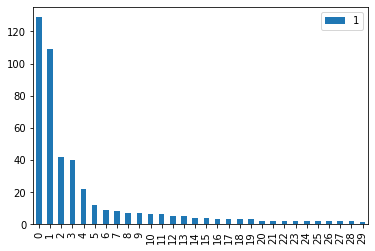

In [5]:
df = data.groupby('Publisher').sum()
publisherCnter = Counter()

print(Count('Publisher',30))


d = pd.DataFrame(Count('Publisher',30))
d.plot.bar()
#print(df['Cites'])
